In [1]:
import pandas as pd 
import numpy as np 
import chardet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
from pytrends.request import TrendReq

In [4]:
core_metrics_df = pd.read_csv('RealEstateTimeSeries.csv', dtype={'ZipCode': "category"})
core_metrics_df.set_index('ZipCode', inplace=True)
print(core_metrics_df)

/home/user0/anaconda3/envs/keras_tf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                                                     Month  \
ZipCode                                                      
01001                                  2019-04-01 00:00:00   
01002                                  2019-04-01 00:00:00   
01005                                  2019-04-01 00:00:00   
01007                                  2019-04-01 00:00:00   
01008                                  2019-04-01 00:00:00   
01010                                  2019-04-01 00:00:00   
01013                                  2019-04-01 00:00:00   
01020                                  2019-04-01 00:00:00   
01022                                  2019-04-01 00:00:00   
01027                                  2019-04-01 00:00:00   
01028                                  2019-04-01 00:00:00   
01030                                  2019-04-01 00:00:00   
01033                                  2019-04-01 00:00:00   
01034                                  2019-04-01 00:00:00   
01035   

In [5]:
print(core_metrics_df.loc['10516'])

                       Month          ZipName Footnote  Median Listing Price  \
ZipCode                                                                        
10516    2019-04-01 00:00:00  Cold Spring, NY      NaN              597050.0   
10516    2019-03-01 00:00:00  Cold Spring, NY        *              587550.0   
10516    2019-02-01 00:00:00  Cold Spring, NY      NaN              592050.0   
10516    2019-01-01 00:00:00  Cold Spring, NY      NaN              607550.0   
10516    2018-12-01 00:00:00  Cold Spring, NY      NaN              589050.0   
10516    2018-11-01 00:00:00  Cold Spring, NY      NaN              580050.0   
10516    2018-10-01 00:00:00  Cold Spring, NY      NaN              584550.0   
10516    2018-09-01 00:00:00  Cold Spring, NY      NaN              550050.0   
10516    2018-08-01 00:00:00  Cold Spring, NY      NaN              557300.0   
10516    2018-07-01 00:00:00  Cold Spring, NY      NaN              599050.0   
10516    2018-06-01 00:00:00  Cold Sprin

In [6]:
main_df = pd.DataFrame({'Month': core_metrics_df.loc['10516']['Month'],
                        'Median Listing Price': core_metrics_df.loc['10516']['Median Listing Price']})
main_df.drop(main_df.index)
main_df.set_index('Month', inplace=True)
main_df.index = pd.to_datetime(main_df.index)
main_df.sort_values(by='Month', inplace=True)
print(main_df)

            Median Listing Price
Month                           
2012-05-01              499950.0
2012-06-01              499950.0
2012-07-01              499050.0
2012-08-01              499050.0
2012-09-01              549050.0
2012-10-01              546550.0
2012-11-01              544050.0
2012-12-01              549050.0
2013-01-01              474775.0
2013-02-01              499275.0
2013-03-01              499050.0
2013-04-01              511775.0
2013-05-01              512225.0
2013-06-01              571550.0
2013-07-01              565150.0
2013-08-01              534500.0
2013-09-01              509500.0
2013-10-01              544500.0
2013-11-01              479050.0
2013-12-01              479050.0
2014-01-01              527300.0
2014-02-01              500000.0
2014-03-01              479950.0
2014-04-01              515050.0
2014-05-01              497500.0
2014-06-01              498050.0
2014-07-01              496550.0
2014-08-01              499050.0
2014-09-01

In [7]:
pytrend = TrendReq()

In [8]:
search = 'Cold Spring NY'
pytrend.build_payload(kw_list=[search], timeframe='all')

In [9]:
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df.drop(interest_over_time_df.index[-1], inplace=True)
interest_over_time_df['MA'] = interest_over_time_df[search].rolling(window=12).mean()
print(interest_over_time_df)


            Cold Spring NY isPartial         MA
date                                           
2004-01-01              37     False        NaN
2004-02-01              44     False        NaN
2004-03-01              49     False        NaN
2004-04-01              59     False        NaN
2004-05-01              51     False        NaN
2004-06-01              81     False        NaN
2004-07-01              70     False        NaN
2004-08-01              99     False        NaN
2004-09-01              57     False        NaN
2004-10-01              66     False        NaN
2004-11-01              52     False        NaN
2004-12-01              23     False  57.333333
2005-01-01              36     False  57.250000
2005-02-01              26     False  55.750000
2005-03-01              41     False  55.083333
2005-04-01              42     False  53.666667
2005-05-01              40     False  52.750000
2005-06-01              41     False  49.416667
2005-07-01              50     False  47

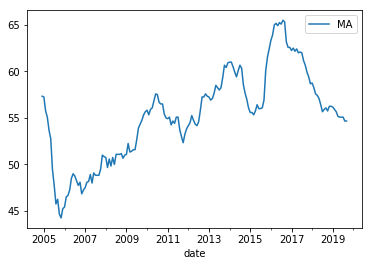

In [10]:
ax1 = plt.gca()
interest_over_time_df.plot(kind='line',y='MA',ax=ax1)

In [11]:
main_df = pd.concat([main_df, interest_over_time_df['MA']], axis=1)

In [12]:
print(main_df)

            Median Listing Price         MA
2004-01-01                   NaN        NaN
2004-02-01                   NaN        NaN
2004-03-01                   NaN        NaN
2004-04-01                   NaN        NaN
2004-05-01                   NaN        NaN
2004-06-01                   NaN        NaN
2004-07-01                   NaN        NaN
2004-08-01                   NaN        NaN
2004-09-01                   NaN        NaN
2004-10-01                   NaN        NaN
2004-11-01                   NaN        NaN
2004-12-01                   NaN  57.333333
2005-01-01                   NaN  57.250000
2005-02-01                   NaN  55.750000
2005-03-01                   NaN  55.083333
2005-04-01                   NaN  53.666667
2005-05-01                   NaN  52.750000
2005-06-01                   NaN  49.416667
2005-07-01                   NaN  47.750000
2005-08-01                   NaN  45.750000
2005-09-01                   NaN  46.250000
2005-10-01                   NaN

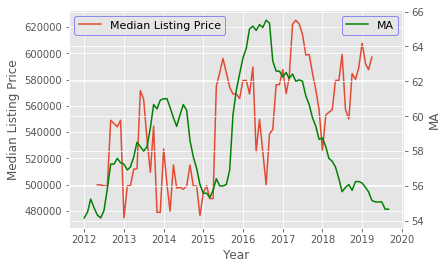

In [13]:
def graph_data(val1,val2): 
    style.use('ggplot')
    fig, ax1 = plt.subplots()
    ax1.plot(val1.index, val1)
    #ax1.plot(a.index, b)
    ax2 = ax1.twinx()
    ax2.plot(val2, c='g')
    ax1.set_xlabel('Year')
    ax1.set_ylabel(val1.name)
    ax2.set_ylabel(val2.name)
    ax1.legend(loc=0, fontsize=11, frameon=True).get_frame().set_edgecolor('blue')
    ax2.legend(loc=0, fontsize=11, frameon=True).get_frame().set_edgecolor('blue')
    
graph_data(main_df['Median Listing Price'], main_df['MA']['2012-01-01':])